In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load data from path
df01 = pd.read_csv("csv_experiments_WEB1.csv")
df02 = pd.read_csv("csv_experiments_WEB2.csv")
df03 = pd.read_csv("csv_experiments_WEB3.csv")
#df = pd.read_csv("RealData.csv")

# do renaming and selection
mapping = {
    "param__func__mp.input__cmd_start": "size",
    "metric__mp.input.vdu01.0__ab_transfer_rate_kbyte_per_second": "throughput",
}

mapping01 = mapping.copy()
mapping01["param__func__de.upb.lb-nginx.0.1__cpu_bw"] = "CPU"

mapping02 = mapping.copy()
mapping02["param__func__de.upb.lb-haproxy.0.1__cpu_bw"] = "CPU"

mapping03 = mapping.copy()
mapping03["param__func__de.upb.px-squid.0.1__cpu_bw"] = "CPU"

In [3]:
def select_and_rename(df, mapping):
    """
    Helper: Selects columns of df using the keys of the mapping dict.
    It renames the columns to the values of the mappings dict.
    """
    # select subset of columns
    dff = df[list(mapping.keys())]
    # rename 
    for k, v in mapping.items():
        dff.rename(columns={k: v}, inplace=True)
    return dff

In [4]:
def replaceSize(df):
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 99999999 -e /tngbench_share/ab_dist.csv -s 60 -k -i http://20.0.0.254:8888/", "small")
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 99999999 -e /tngbench_share/ab_dist.csv -s 60 -k http://20.0.0.254:8888/bunny.mp4", "big")
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 99999999 -e /tngbench_share/ab_dist.csv -s 60 -k -i -X 20.0.0.254:3128 http://40.0.0.254:80/", "small")
    df["size"] = df["size"].str.replace("ab -c 1 -t 60 -n 99999999 -e /tngbench_share/ab_dist.csv -s 60 -k -X 20.0.0.254:3128 http://40.0.0.254:80/bunny.mp4", "big")
    return df


In [14]:
def showAndSave(df, size, name):
    y = df['throughput']
    X = df[['CPU']]
    df = df.drop(columns=['size','vnf'])
    data = df.values.tolist()

    # Plotting
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(X,y)
    plt.show()
    
    df = pd.DataFrame(data, columns=['CPU','throughput'])
    df.to_csv("RealData_"+name+"_"+size+".csv", sep=',')

In [6]:
df01 = select_and_rename(df01, mapping01)
df02 = select_and_rename(df02, mapping02)
df03 = select_and_rename(df03, mapping03)
df01["vnf"] = "nginx"
df02["vnf"] = "haproxy"
df03["vnf"] = "squid"

#df_list = [df01, df02, df03]

df01 = replaceSize(df01)
df02 = replaceSize(df02)
df03 = replaceSize(df03)

# select sub-datasets with small and large flows
df1_small = df01.loc[df01["size"] == "small"]
df1_big = df01.loc[df01["size"] == "big"]

df2_small = df02.loc[df02["size"] == "small"]
df2_big = df02.loc[df02["size"] == "big"]

df3_small = df03.loc[df03["size"] == "small"]
df3_big = df03.loc[df03["size"] == "big"]
#print(df['size'],df['MEM'],df['throughput'],df['CPU'])


c:\users\stefan\git-repos\work\ai\venv\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


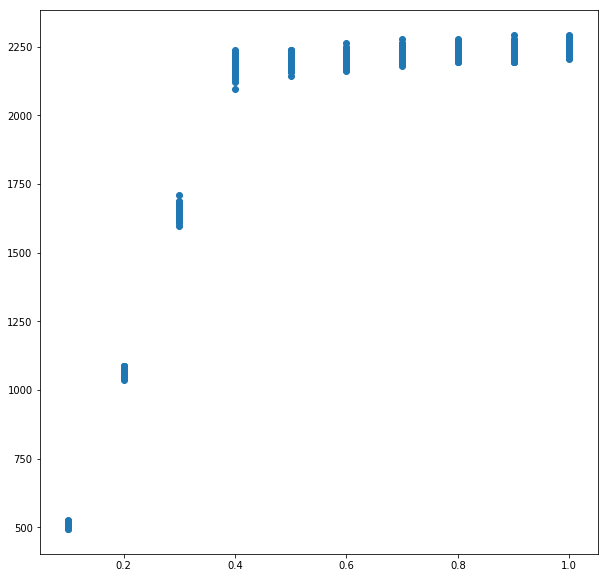

In [15]:
showAndSave(df1_small, "small", "nginx")
# showAndSave(df1_big, "big", "nginx")

# showAndSave(df2_small, "small", "haproxy")
# showAndSave(df2_big, "big", "haproxy")

# showAndSave(df3_small, "small", "squid")
# showAndSave(df3_big, "big", "squid")